# Vector Field Quiver Plots with matplot

### Pred-Prey

$$
x' = 0.20x(1 - y) \\
y' = 0.23y(x - 1)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

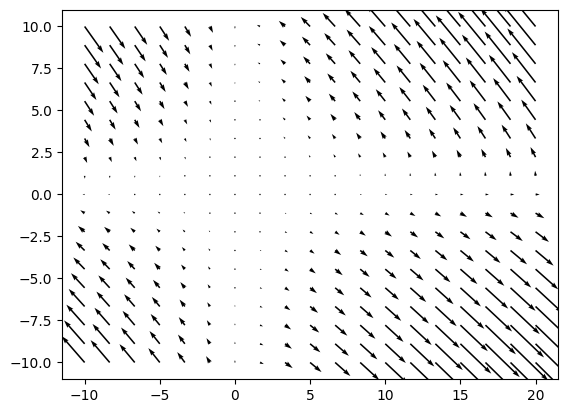

In [32]:
# Define the grid
xs = np.linspace(-10, 20, 19)
ys = np.linspace(-10, 10, 19)

# Define the vector field
def u(x, y): 
    '''
        x component of the vector field
    '''
    return 0.20*x*(1 - y)

def v(x, y): 
    '''
        y component of the vector field
    '''
    return 0.23*y*(x - 1)

# Evaluate the function on the grid
us = [u(xs, yi) for yi in ys]
vs = [v(xs, yi) for yi in ys]

# Plot the vector field
plt.quiver(xs, ys, us, vs)

In [63]:
def system(t, x): 
    return [u(x[0], x[1]), v(x[0], x[1])]

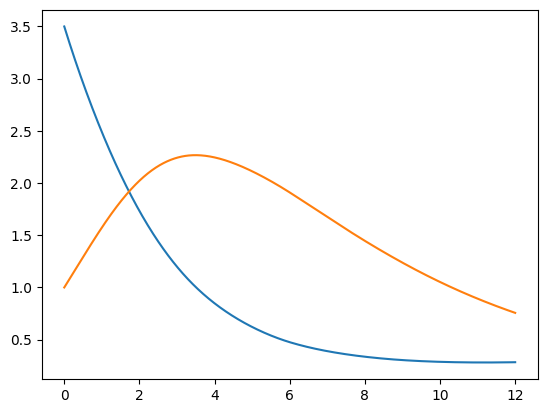

In [64]:
sol = solve_ivp(system, t_span=[0, 12], y0=[3.5, 1], t_eval=np.linspace(0, 12, 1000))
plt.plot(sol.t, sol.y.T)

$$
x' = 0.20x(1-y-\frac xK)\\
y' = 0.23y(-1+x)
$$
with $K=2.1$

Text(0.5, 1.0, 'Pred-Prey: Black points are the end points, red points are the start points')

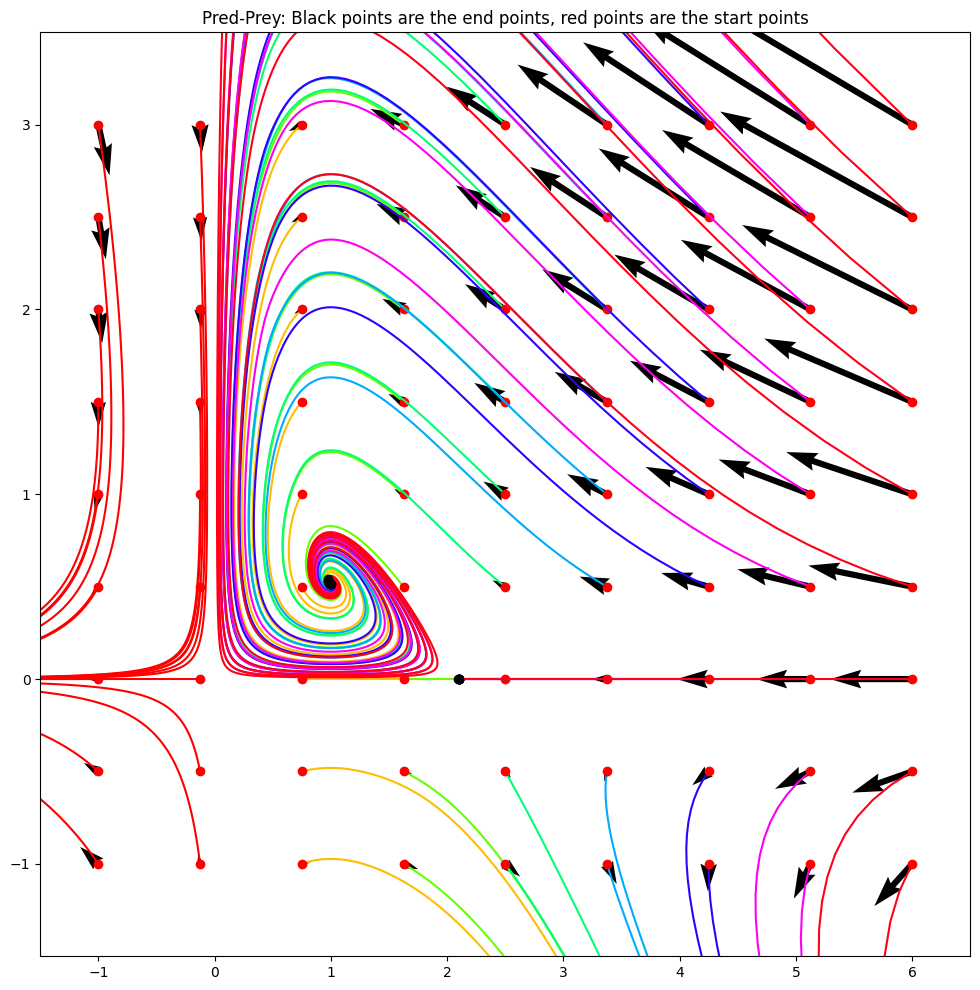

In [3]:
'''
    This code loops over all the points in the grid and 
    plots the trajectories starting at each point.

    The trajectories are plotted in blue.

    The starting points are plotted in red.
    The ending points are plotted in black.

    The vector field is plotted in the background.

    The trajectories are plotted for a time depth of 6.6.
    This is controlled by the variable t_depth.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

cmap = plt.get_cmap('hsv')

def u(x, y):
    return 0.2*x*(1 - y - x/2.1)

def v(x, y):
    return 0.23*y*(x - 1)


xs = np.linspace(-1, 6, 9)
ys = np.linspace(-1, 3, 9)

us = [u(xs, yi) for yi in ys]
vs = [v(xs, yi) for yi in ys]

def system(t, x):
    return [u(x[0], x[1]), v(x[0], x[1])]

from itertools import product
sun_spots = product(xs, ys)


t_depth = 120.6 # this variable controls how long the trajectories are

plt.figure(figsize=(12, 12))
for sun_spot in sun_spots:
    sol = solve_ivp(system, t_span=[0, t_depth], y0=sun_spot, t_eval=np.linspace(0, t_depth, 1000))
    plt.plot(*sol.y, '-', color=cmap(sun_spot[0]/6))

    # starting point 
    plt.plot(*sun_spot, 'ro', label=f'start {sun_spot}')
    # ending point
    plt.plot(*sol.y[:, -1], 'ko', label=f'end point {sol.y[:, -1]}')

plt.quiver(xs, ys, us, vs)
plt.xlim(-1.5, 6.5)
plt.ylim(-1.5, 3.5)
plt.title("Pred-Prey: Black points are the end points, red points are the start points")
# plt.legend()

In [12]:
cmap(200)

(0.632351667278138, 0.0, 1.0, 1.0)

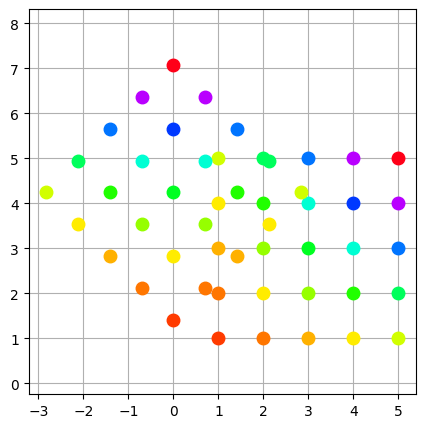

In [37]:
from itertools import product
import matplotlib.pyplot as plt

Z = [1,2,3,4,5]

cmap = plt.get_cmap('hsv')

plt.figure(figsize=(5, 5))

M = np.array([
                [np.cos(np.pi/4), -np.sin(np.pi/4)],
                [np.sin(np.pi/4), np.cos(np.pi/4)]
            ])

plt.grid()
plt.axis('equal')
for x, y in product(Z, Z):
    plt.plot(x, y, '.', ms=18, color=cmap((x*y)/25))
    new_pt = M @ np.array([x, y])
    plt.plot(*new_pt, '.', ms=18, color=cmap((x*y)/25))


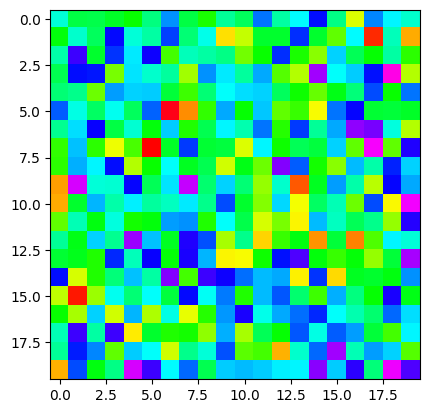

In [21]:
n = 20 
M = np.random.randn(n,n)

plt.imshow(M, cmap='hsv')

In [2]:
from itertools import product

def quiver_plot(u, v, xs, ys, initial_points, t_depth=10):
    '''
        u,v is the vector field
        y0 is the initial point
        p is the parameter vector
    '''
    us = [u(xs, yi) for yi in ys]
    vs = [v(xs, yi) for yi in ys]

    def system(t, x):
        return [u(x[0], x[1]), v(x[0], x[1])]

    plt.figure(figsize=(12, 12))

    
    for y0 in initial_points:
        sol = solve_ivp(system, t_span=[0, t_depth], y0=y0, t_eval=np.linspace(0, t_depth, 1000))
        plt.plot(*sol.y, 'b-')

        # starting point 
        plt.plot(*y0, 'ro', label=f'start {y0}')
        # ending point
        plt.plot(*sol.y[:, -1], 'o', color='yellow', label=f'end point {sol.y[:, -1]}', ms=16)

    plt.quiver(xs, ys, us, vs)
    plt.xlim(xs[0]-0.5, xs[-1]+0.5)
    plt.ylim(ys[0]-0.5, ys[-1]+0.5)
    plt.title("Yellow is end points, red is start points")
    # plt.legend()

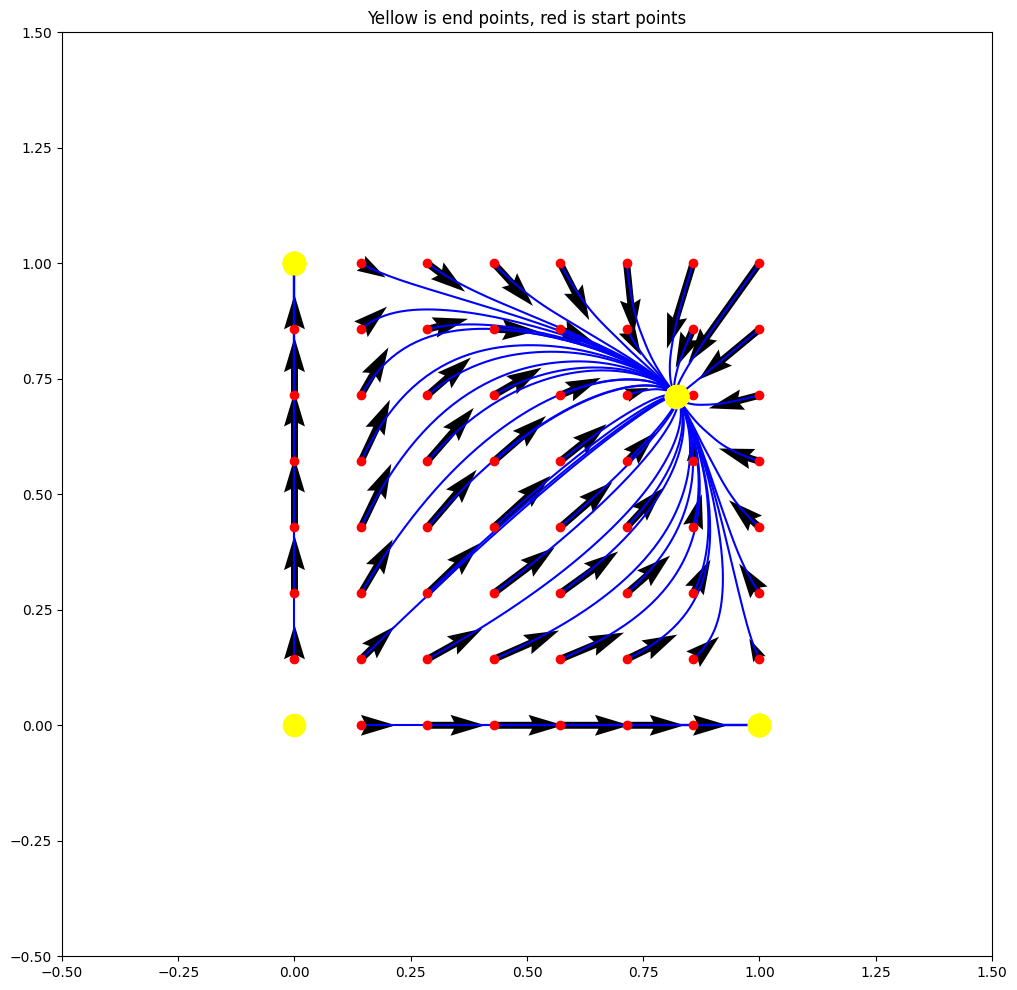

In [3]:
a = 0.25
b = 0.35

num_arrows = 8

def u(x, y): return x*(1 - a*y - x)
def v(x, y): return y*(1 - b*x - y)

xs = np.linspace(0, 1, num_arrows)
ys = np.linspace(0, 1, num_arrows)

quiver_plot(u, v, xs, ys, initial_points=product(xs, ys), t_depth=100)

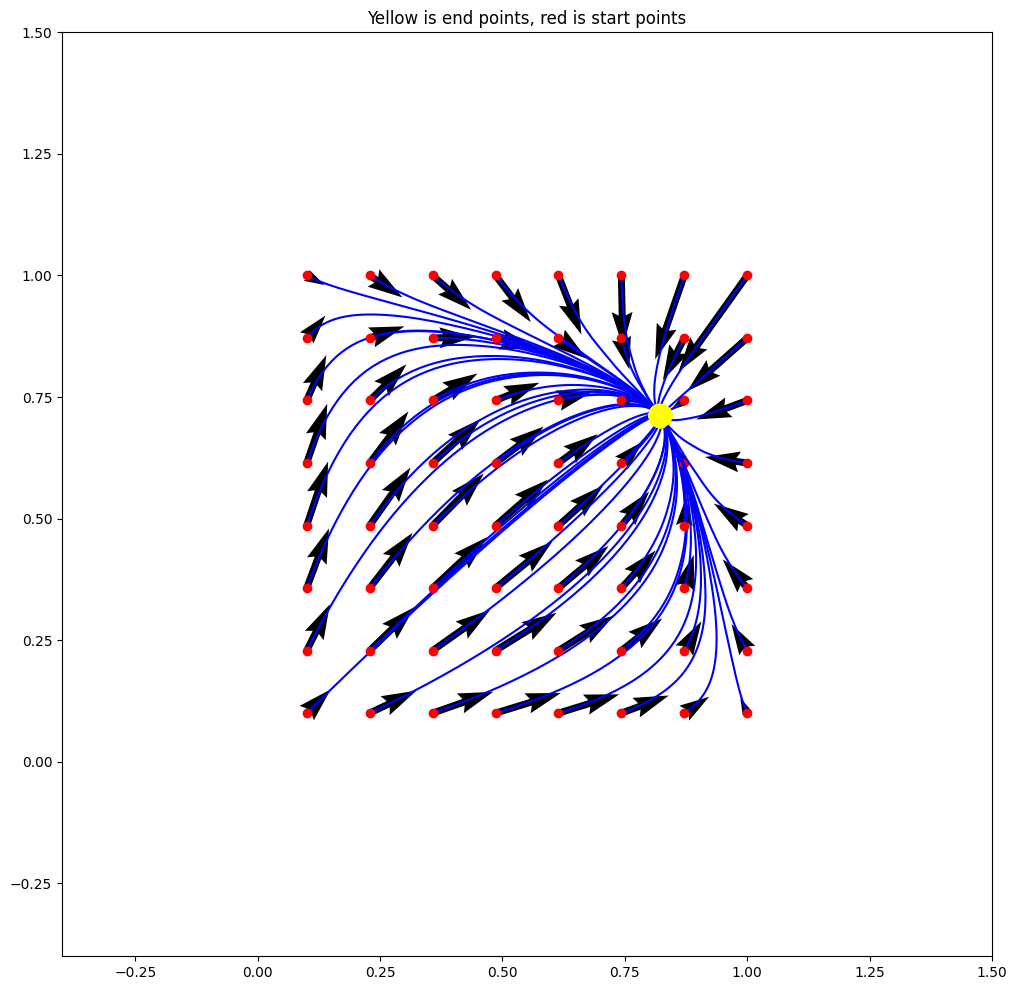

In [4]:
a = 0.25
b = 0.35

num_arrows = 8

def u(x, y): return x*(1 - a*y - x)
def v(x, y): return y*(1 - b*x - y)

xs = np.linspace(0.1, 1, num_arrows)
ys = np.linspace(0.1, 1, num_arrows)

quiver_plot(u, v, xs, ys, initial_points=product(xs, ys), t_depth=100)

0.29289322626098324
0.29289321881345254


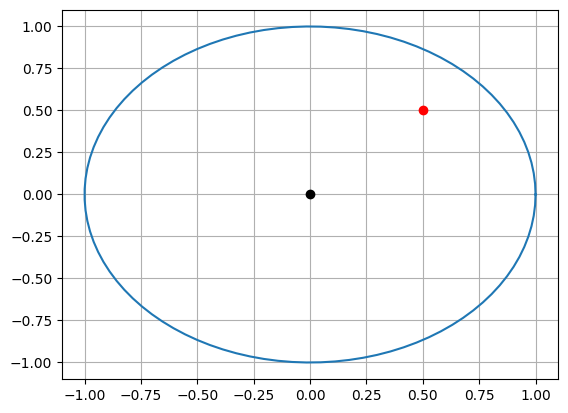

In [22]:
def circle(center, radius, n=100):
    '''
        Return x,y points on the circle with center and radius
    '''
    theta = np.linspace(0, 2*np.pi, n)
    x = center[0] + radius*np.cos(theta)
    y = center[1] + radius*np.sin(theta)
    return x, y

def shortest_distance_to_circle(center, radius, point, n=100):
    '''
        Return the shortest distance from the point to the circle
    '''
    x, y = circle(center, radius, n=n)
    return np.min(np.sqrt((x - point[0])**2 + (y - point[1])**2))

print(shortest_distance_to_circle([0, 0], 1, [0.5, 0.5], n=10000))
plt.plot(*circle([0, 0], 1))
plt.plot(0.5, 0.5, 'ro')
plt.plot(0, 0, 'ko')
plt.grid()

print(( (np.sqrt(2)/2 - 0.5)**2 + (np.sqrt(2)/2 - 0.5)**2 )**0.5)


0.2911067811865476

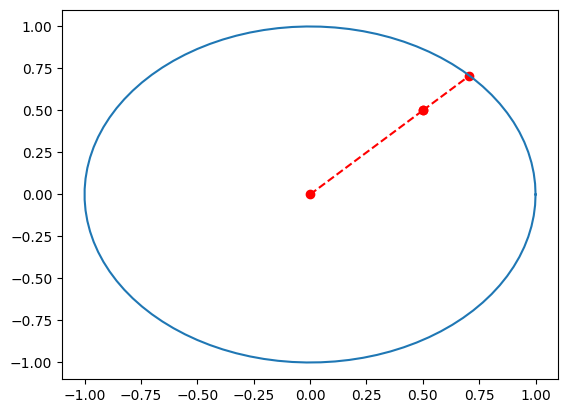

In [41]:
dir = np.array([0.1, 0.1])
dir = dir / np.linalg.norm(dir)
most = dir * (1 - 0.292)
last_bit = np.array([0.5, 0.5]) + dir * (0.292)
plt.plot([0, most[0]], [0, most[1]], 'ro--')
plt.plot([most[0], last_bit[0]], [most[1], last_bit[1]], 'ro--')
plt.plot(*circle([0, 0], 1))

np.linalg.norm(most-last_bit)